In [159]:
import os

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm


# Importing Political data

In [88]:
political_2015=pd.read_excel("AC-50.xlsx")
political_2013=pd.read_excel("AC501.xlsx")

Data cleaning

In [89]:
political_2015=political_2015.iloc[:,0:10]
political_2013=political_2013.iloc[:,0:8]

In [90]:
political_2015.head()

,Polling Station,ADITYA(BSP),RAKESH KUMAR GULLAIYA(BJP),ROHIT TYAGI(NCP),SHARMISTHA MUKHARJEE(INC),SAURABH BHARADWAJ(AAP),ASHOK KUMAR(SP),ASHOK KUMAR SHARMA(SHS),SANJAY KHATRI(IND),Valid Votes
0,1,3,435,0,51,491,2,0,1,983
1,2,3,221,1,41,490,3,0,2,761
2,3,0,361,1,43,414,0,1,2,822
3,4,2,255,1,29,409,1,0,1,698
4,5,0,345,1,51,434,0,0,0,831


In [91]:
political_2013.head()

,Polling Station,Ajay Kumar Malhotra(BJP),Mukesh Bhardwaj(BSP),Virender Kasana(INC),Nanhey Khan Qureshi(SP),Saurabh Bharadwaj(AAP),Ashok Kumar(IND),Valid Votes
0,1,243,8,136,0,348,0,735
1,2,210,10,142,5,337,2,706
2,3,297,2,102,7,325,2,735
3,4,183,4,83,1,348,2,621
4,5,223,2,96,3,387,1,712


# DATA ANALYSIS

In [92]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(political_2015))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

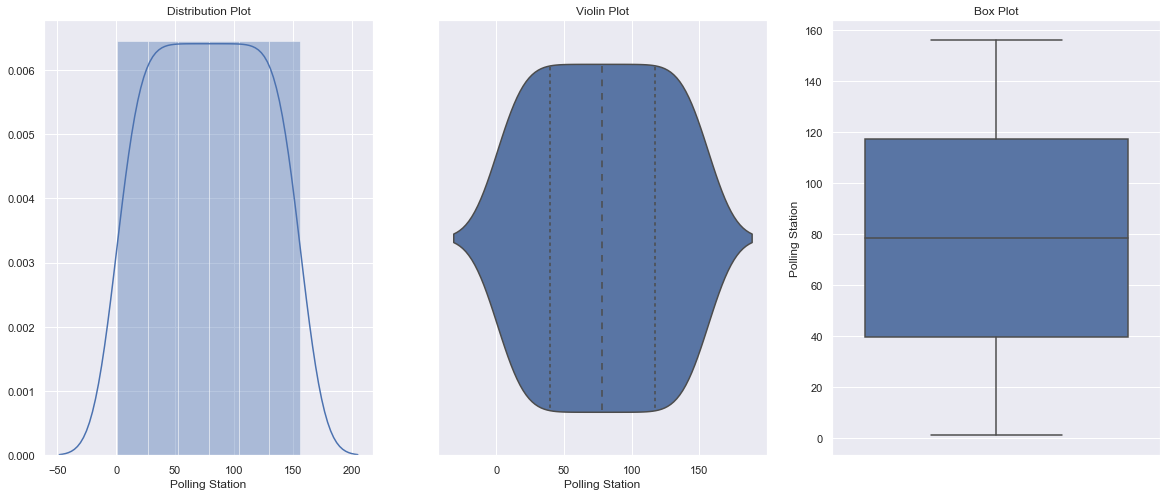

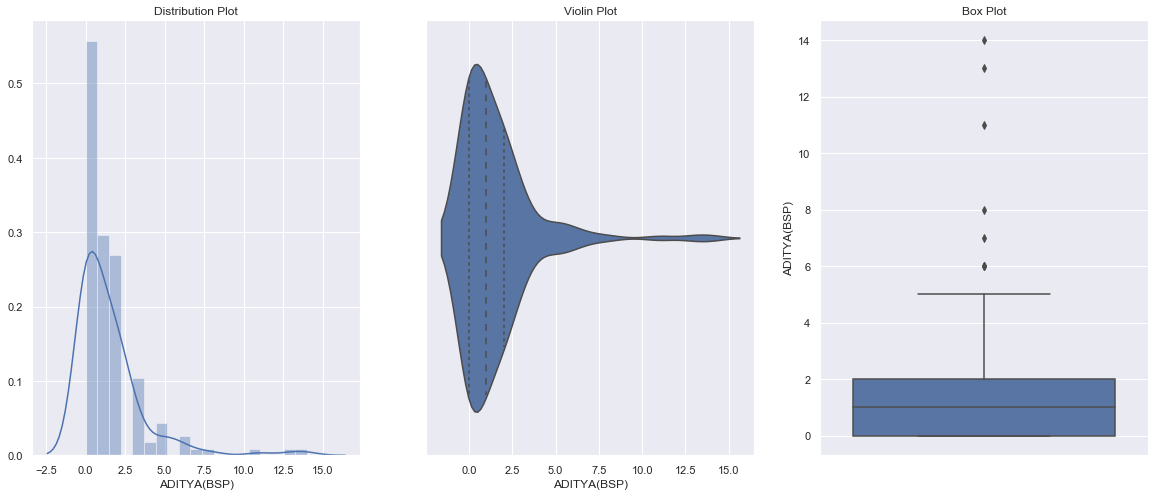

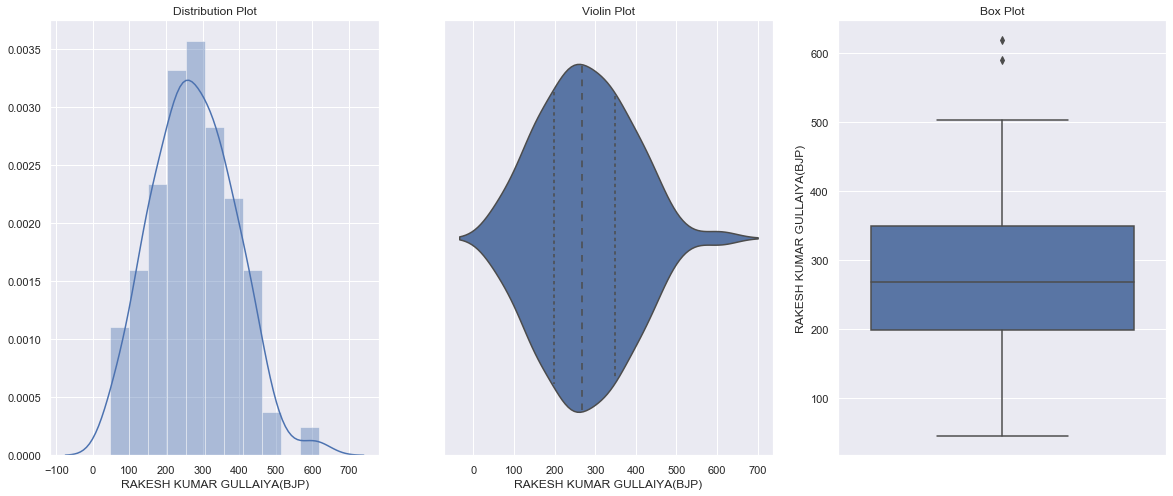

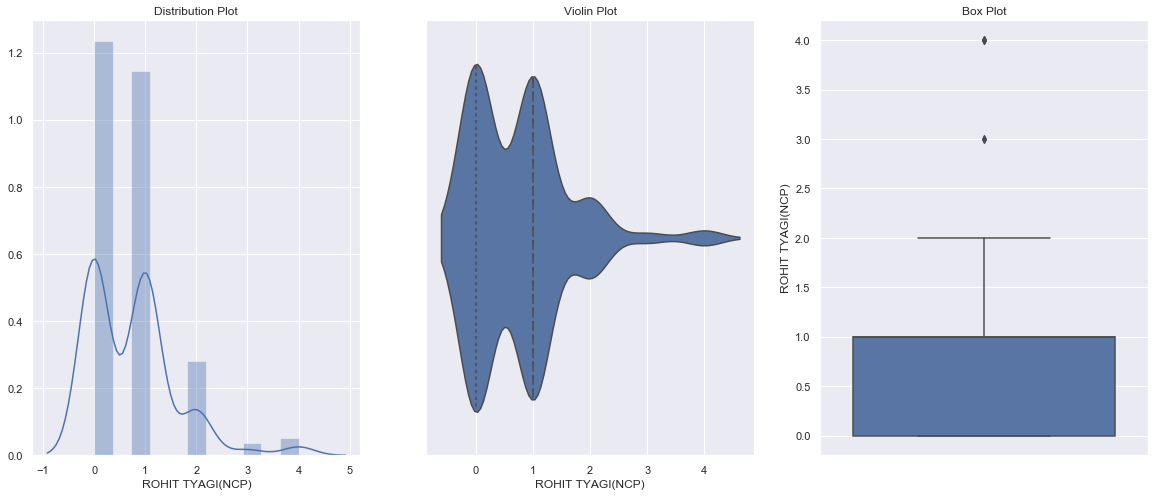

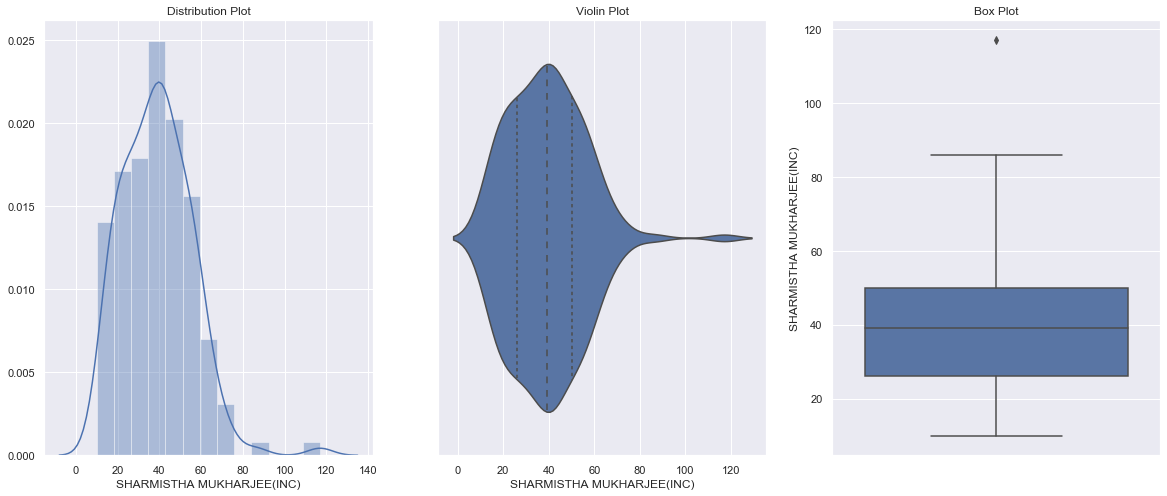

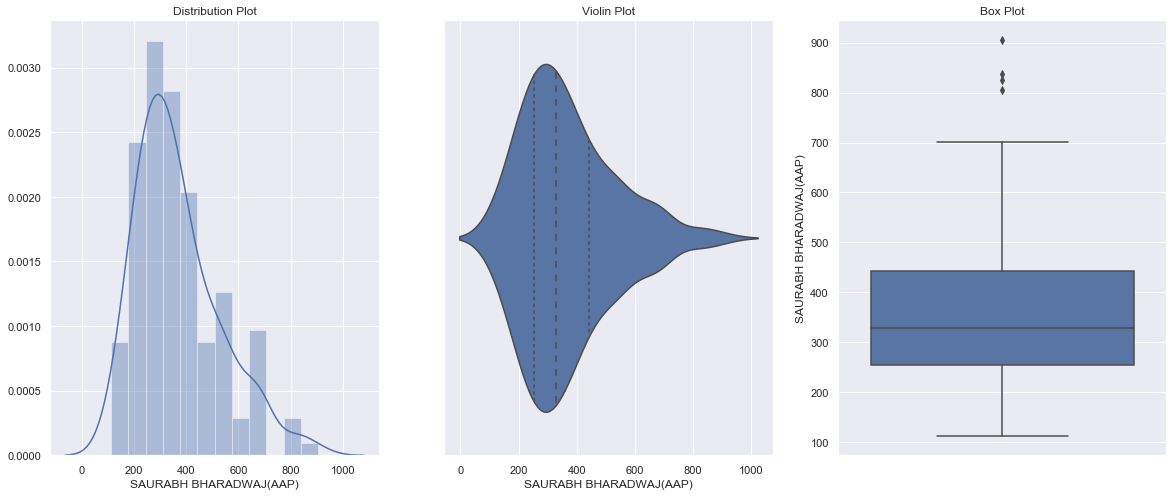

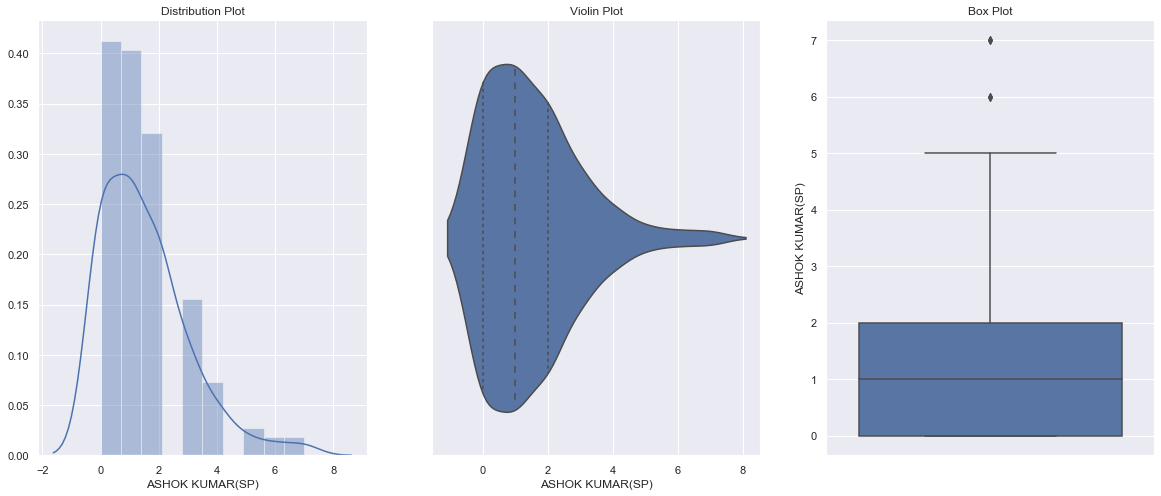

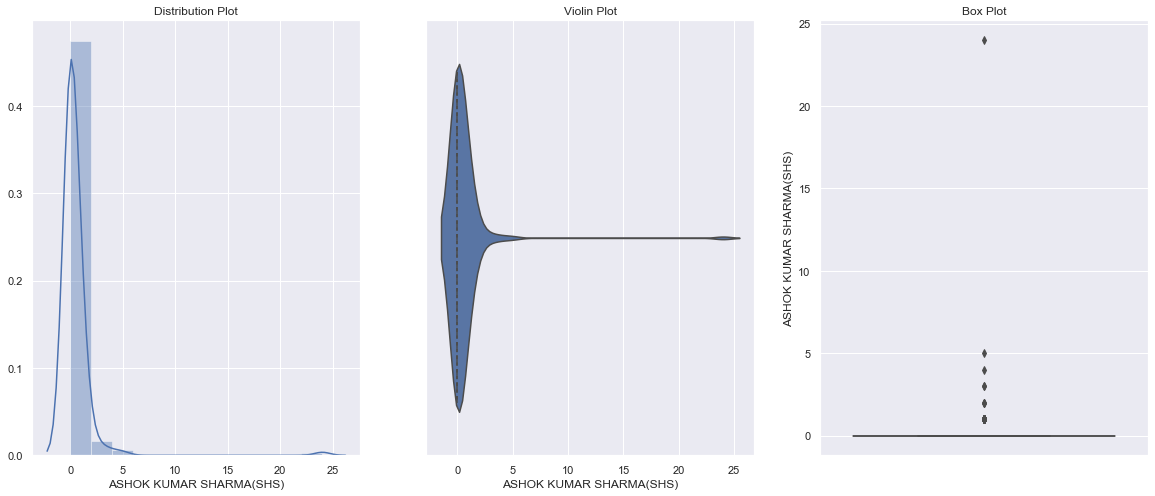

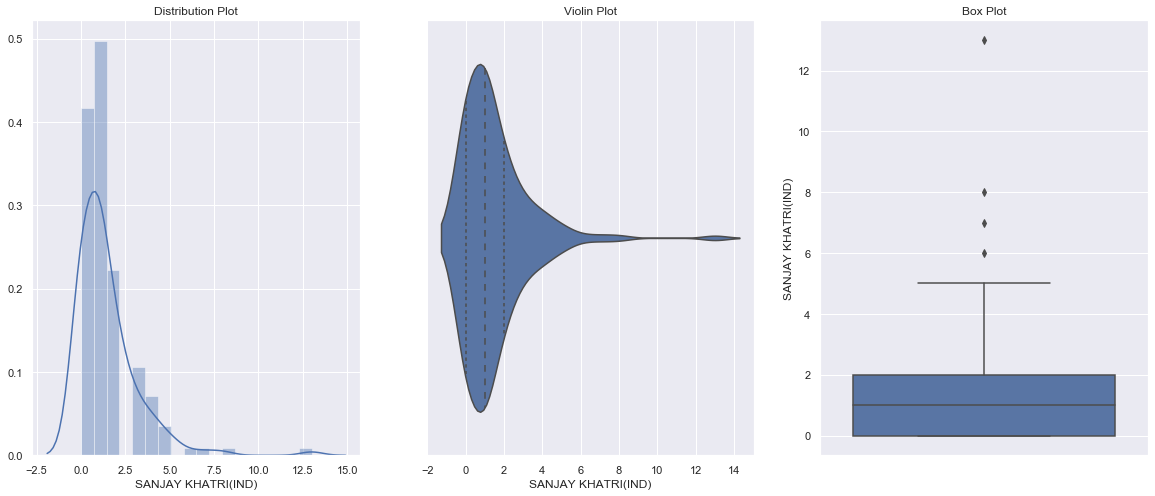

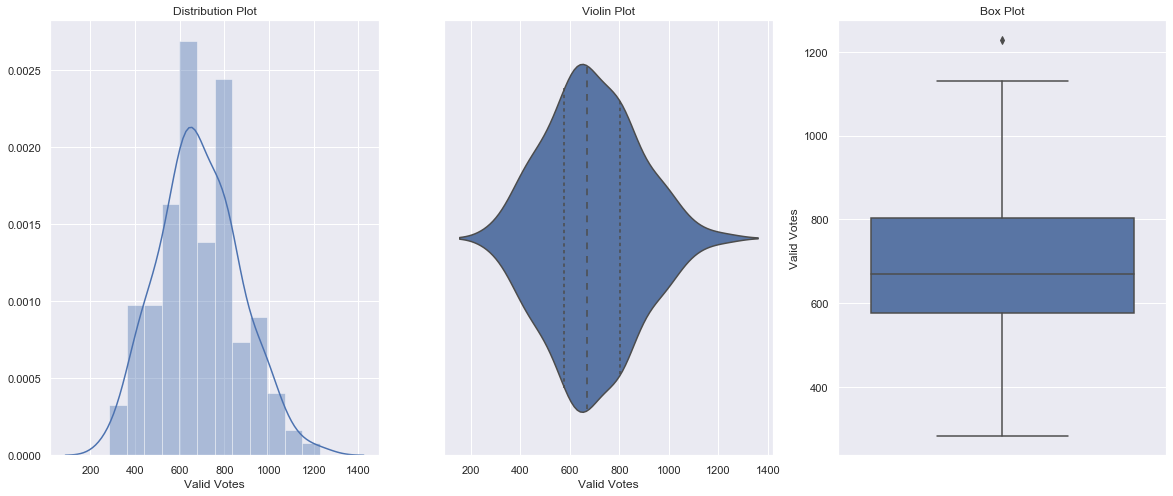

In [93]:
list1=[]
list2=[]
for col in political_2015.columns:
    list1.append(col)
    a=str(col)
    univariate(df=political_2015,col=a,vartype=0)
    list2.append(political_2015[a].sum())
list1=list1[1:len(list1)-1]
list2=list2[1:len(list2)-1]



In the VIDHANSABHA ELECTION of 2015,we have seen from plot that only 2 candidates Rakesh Kumar Gullaiya of BJP and Saurabh Kumar Bhardwaj of AAP getting votes in all polling station and rest of the candidates is getting negligible amount of votes.

In [94]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(political_2013))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

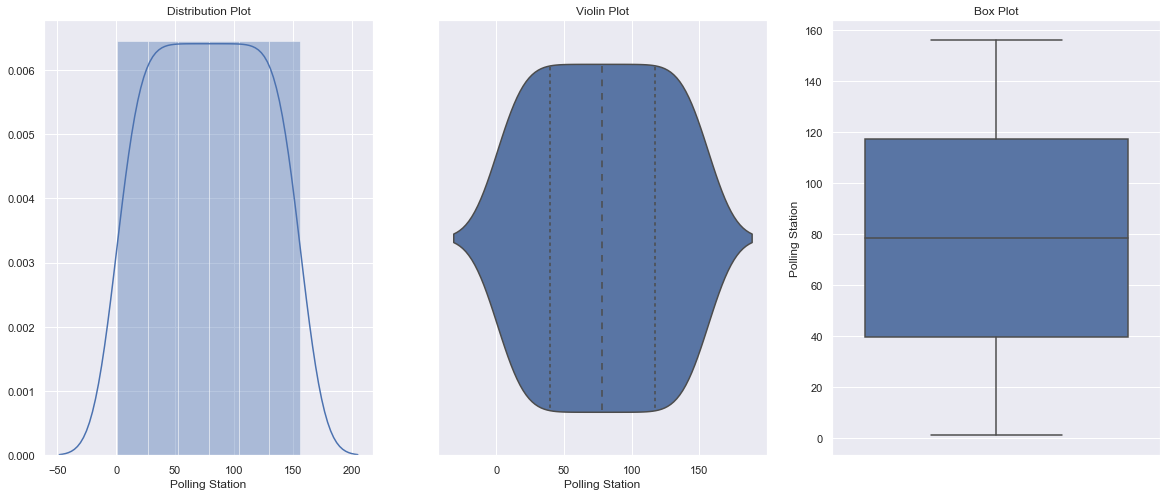

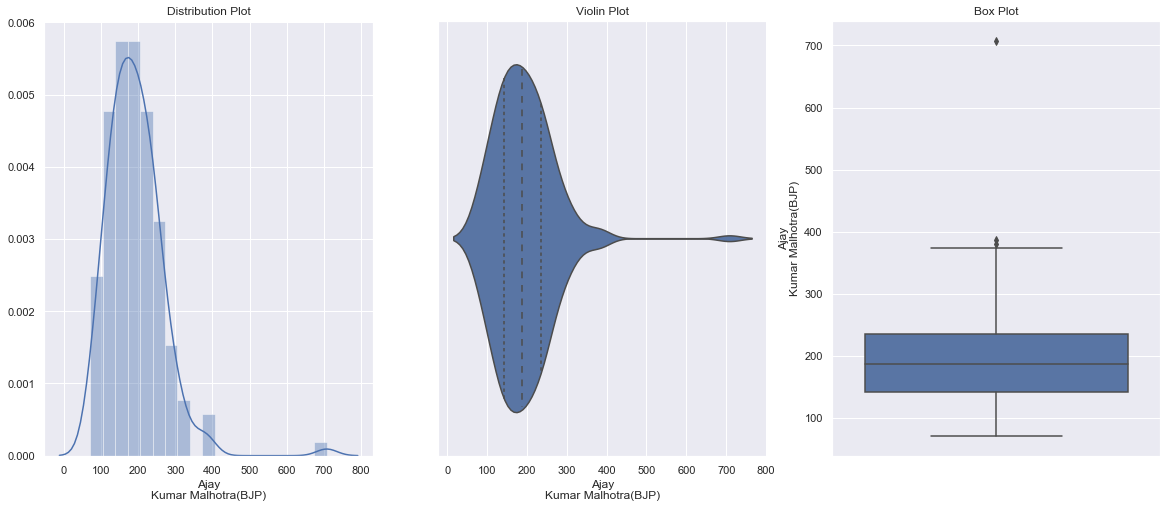

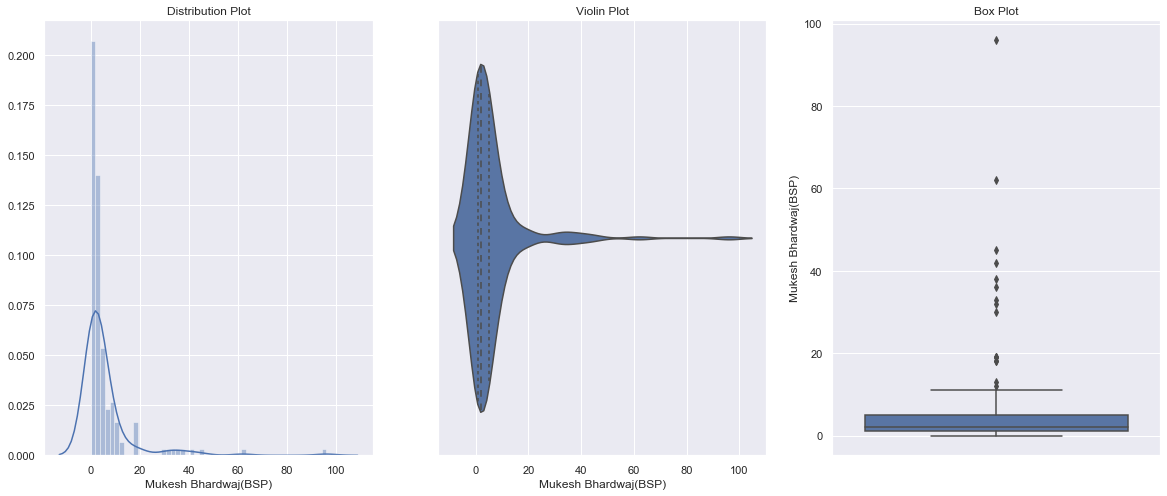

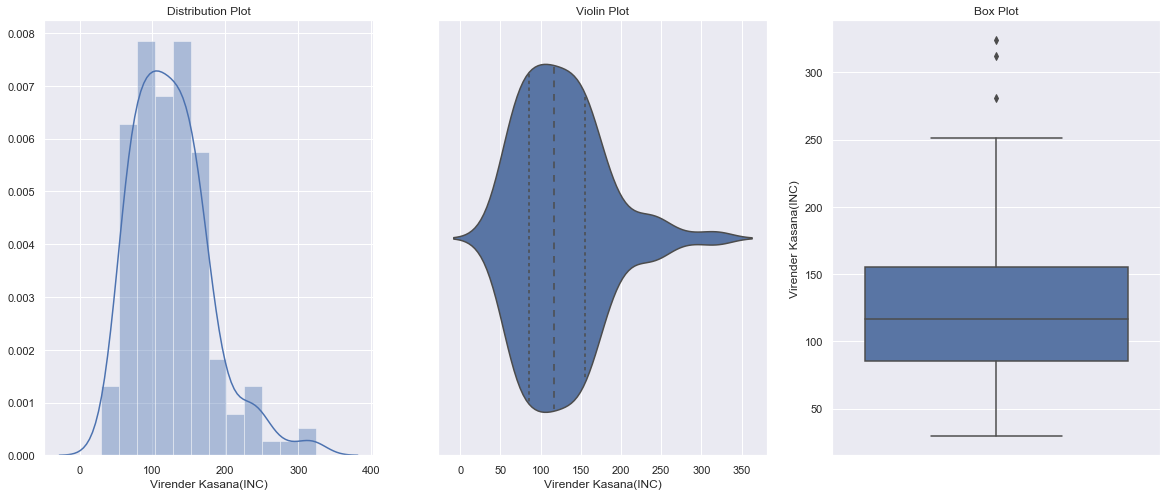

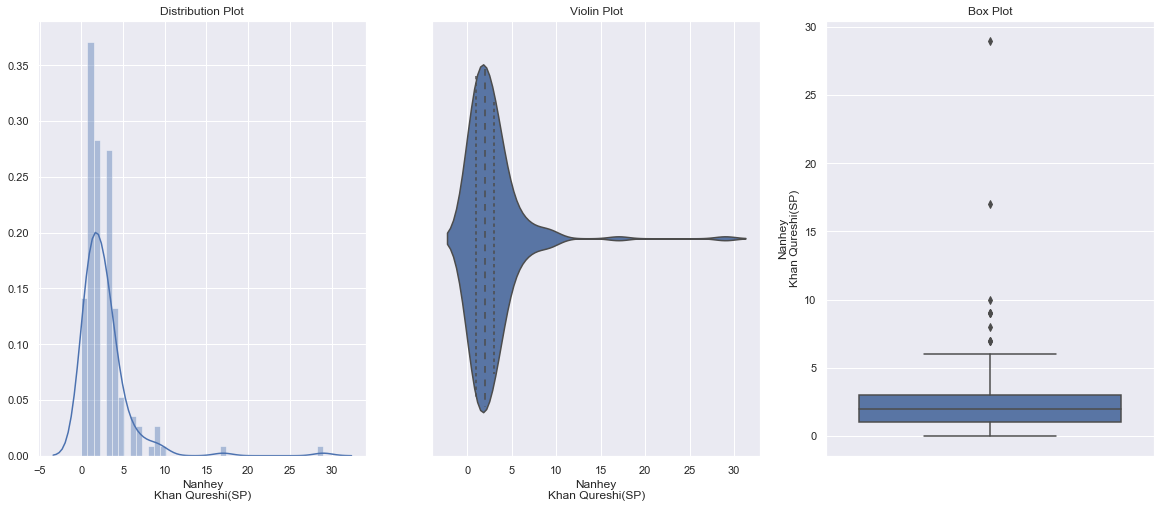

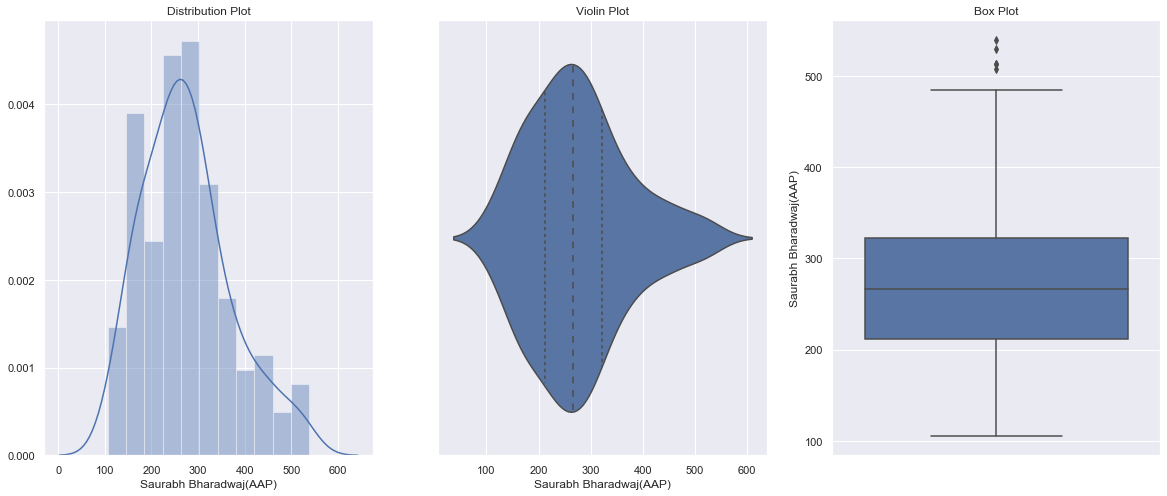

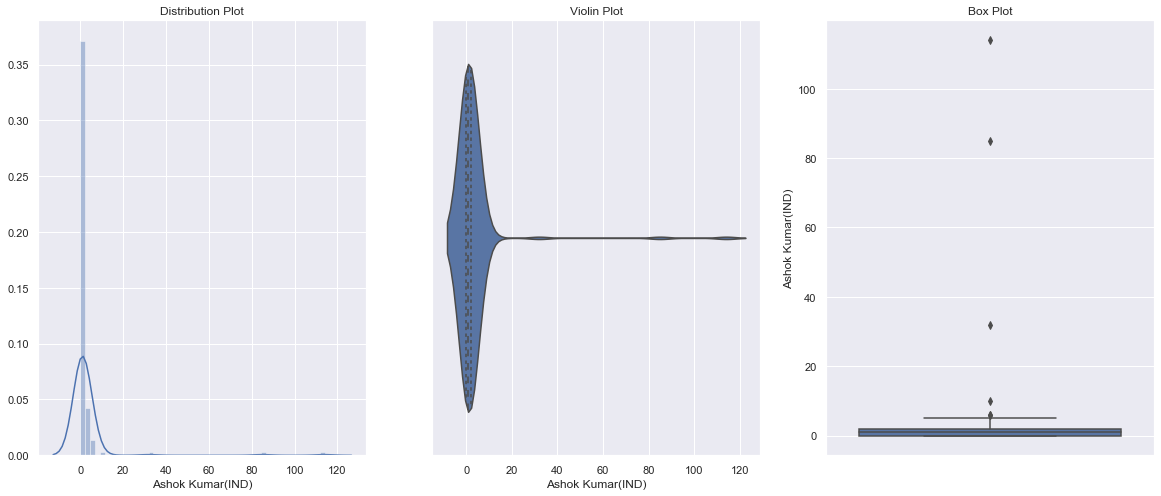

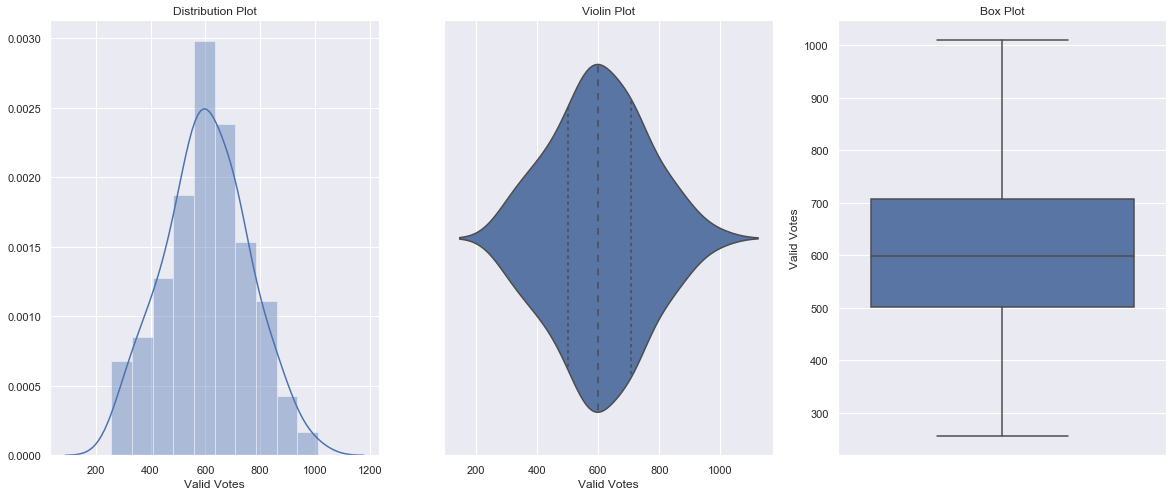

In [95]:
list3=[]
list4=[]
for col in political_2013.columns:
    list3.append(col)
    a=str(col)
    univariate(df=political_2013,col=a,vartype=0)
    list4.append(political_2013[a].sum())
list3=list3[1:len(list3)-1]
list4=list4[1:len(list4)-1]


In the VIDHANSABHA ELECTION of 2013,we have seen from plot that only 3 candidates Ajay Kumar Malhotra of BJP,Virendra Kasana of INC and Saurabh Kumar Bhardwaj of AAP getting votes in all polling station and rest of the candidates is getting negligible amount of votes.

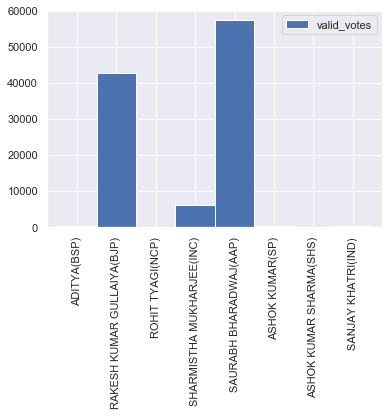

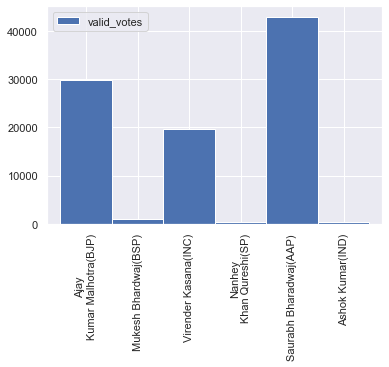

In [96]:
df_2015 = pd.DataFrame({'valid_votes': list2}, index=list1)
ax = df_2015.plot(kind='bar', stacked=True, width=1)
df_2013 = pd.DataFrame({'valid_votes': list4}, index=list3)
ax = df_2013.plot(kind='bar', stacked=True, width=1)

In the VIDHANSABHA ELECTION of 2015 and 2013,we have seen from plot that Saurabh Kumar Bhardwaj of AAP got maximum votes and win the election.

# MACHINE LEARNING 

Importing excel file having Partywise vote data.

In [195]:
new_data=pd.read_excel("partywise.xlsx")

In [196]:
new_data

,No.,party_name,Avg No of votes in 2013 and 2015 election
0,1,AAP,50257
1,2,BJP,36452
2,3,INC,12908
3,4,BSP,576
4,5,SP,333
5,6,IND,328


Data cleaning and encoding the party_name with their respective No.

In [197]:
x=new_data.iloc[:,0:1].values.reshape(-1,1)
y=new_data.iloc[:,2:]

In [198]:
x

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]], dtype=int64)

In [199]:
y

,Avg No of votes in 2013 and 2015 election
0,50257
1,36452
2,12908
3,576
4,333
5,328


Applying Linear Regression

In [201]:
model=LinearRegression()
model.fit(x,y)
y_pred=model.predict(x)

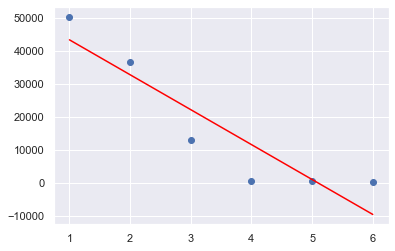

In [215]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

In [203]:
y_pred

array([[43261.42857143],
       [32680.45714286],
       [22099.48571429],
       [11518.51428571],
       [  937.54285714],
       [-9643.42857143]])

# Predicting the winner of 2020 election.

In [216]:

maxi=-9999999999
for i in range(1,7):
    x_new=[[i]]
   
    w=model.predict(x_new)
    
    if max(max(w))>maxi:
        winner=new_data.loc[i-1,'party_name']
        maxi=w
    
print("winner of 2020 election is",winner)
print(winner,"will get",maxi,"votes in 2020")

winner of 2020 election is AAP
AAP will get [[43261.42857143]] votes in 2020
